# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [14]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [4]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

**1. Distribution of target variable**

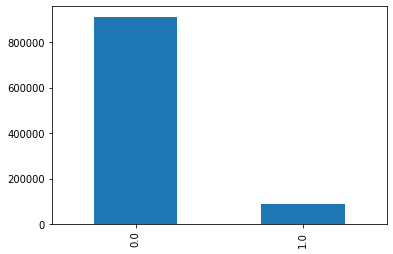

In [47]:
fraud_plt = fraud["fraud"].value_counts()
fraud_plt.plot(kind="bar")

**2. Logistic Regression**

In [54]:
np.abs(fraud.corr())["fraud"].sort_values(ascending=False)

fraud                             1.000000
ratio_to_median_purchase_price    0.462305
online_order                      0.191973
distance_from_home                0.187571
used_pin_number                   0.100293
distance_from_last_transaction    0.091917
used_chip                         0.060975
repeat_retailer                   0.001357
Name: fraud, dtype: float64

In [55]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [56]:
log_reg = LogisticRegression()

In [57]:
log_reg.fit(X_train, y_train)

/Users/amatulghina/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**3. Model Evaluation**

In [58]:
log_reg.score(X_test, y_test)

0.959104

In [59]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    228273
         1.0       1.00      0.09      0.16     21727

    accuracy                           0.92    250000
   macro avg       0.96      0.54      0.56    250000
weighted avg       0.93      0.92      0.89    250000



**4. Run Oversample**

In [60]:
fraud_1 = fraud[fraud["fraud"]==1]
len(fraud_1)

87403

In [61]:
fraud_0 = fraud[fraud["fraud"]==0]
len(fraud_0)

912597

In [62]:
oversampled = resample(fraud_1, replace=True, n_samples = len(fraud_0),random_state=0)

In [63]:
fraud_over = pd.concat([oversampled, fraud_0])

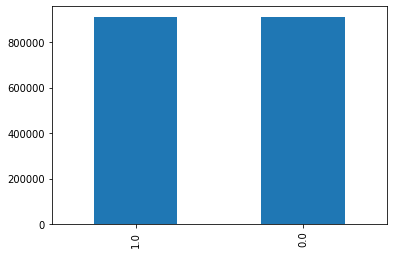

In [64]:
fraud_over_plt = fraud_over["fraud"].value_counts()
fraud_over_plt.plot(kind="bar")

In [65]:
X_train_over = fraud_over.drop(columns = ["fraud"])
y_train_over = fraud_over["fraud"]

In [66]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

/Users/amatulghina/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [69]:
y_pred_test_log = log_reg.predict(X_test)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96    228273
         1.0       0.58      0.95      0.72     21727

    accuracy                           0.94    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.94      0.94    250000



**5. Run Undersample**

In [70]:
undersampled = resample(fraud_0, replace=True, n_samples = len(fraud_1),random_state=0)

In [71]:
fraud_under = pd.concat([undersampled, fraud_1])

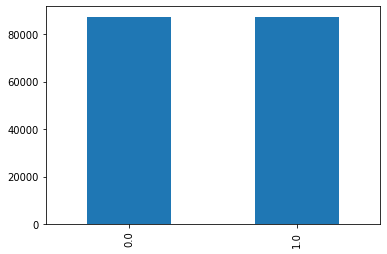

In [72]:
fraud_under_plt = fraud_under["fraud"].value_counts()
fraud_under_plt.plot(kind="bar")

In [75]:
X_train_under = fraud_under.drop(columns = ["fraud"])
y_train_under = fraud_under["fraud"]

In [76]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

/Users/amatulghina/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [77]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94    228273
         1.0       0.39      0.55      0.46     21727

    accuracy                           0.89    250000
   macro avg       0.67      0.73      0.70    250000
weighted avg       0.91      0.89      0.89    250000



**6. Run SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [ ]:
X_train_sm, y_train_sm =  sm.fit_resample(X_train,y_train)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

In [ ]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))